## 1. About Author

- `Name`: Ahmad Mubarak
- `Code Submission Date`: 
- `Project`: Orange Disease Detection
- `Authors Contact info`:
  - [Email](ahmadmubarak01@gmail.com)
  - [LinkedIn](https://www.linkedin.com/in/ahmad-mubarak-19861a177/)
  - [Github](https://github.com/Ahmad1998-RPA)

## 1.1 Meta Data (About the Data)

- `Data`: Orange Fruit Daatset
- `Dataset`: [link](https://www.kaggle.com/datasets/mohammedarfathr/orange-fruit-daatset/data)
- `Description`: The Data set was downloaded from kaggle for ML practice.

## 1.2 Kernel Version Used.

- `Python 3.10.2`

## 1.3 Installed Libraries
- `numpy` `pandas` `matplotlib` `seaborn` `opencv-python` `tensorflow` `keras` `scikit-learn` `albumentations` `plotly`

## 2. Import libraries

In [38]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array



## 3. Load DataSet

In [39]:
# Load the dataset
train_dir = 'E:/DataScience/OrangeDiseaseDetection/Field Data/Train/'
test_dir = "E:/DataScience/OrangeDiseaseDetection/Field Data/Test/"

In [40]:
# Prepare training data
train_paths = []
train_labels = []

for label in sorted(os.listdir(train_dir)): 
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):
        for img in sorted(os.listdir(label_path)):
            train_paths.append(os.path.join(label_path, img))
            train_labels.append(label)

# Prepare testing data
test_paths = []
test_labels = []

for label in sorted(os.listdir(test_dir)):
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):
        for img in sorted(os.listdir(label_path)):
            test_paths.append(os.path.join(label_path, img))
            test_labels.append(label)

## 4. Visualzation

- Let's visualize `10` random images.

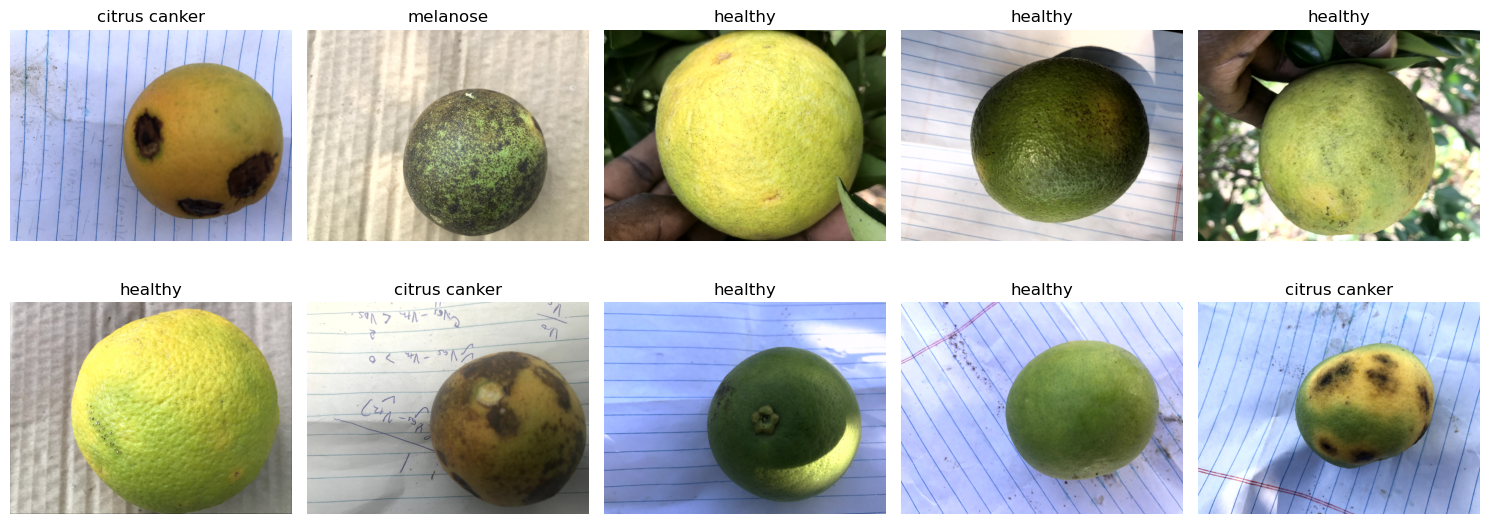

In [41]:
# Select 10 random indices
random_indices = random.sample(range(len(train_paths)), 10)

# Plot images with labels
plt.figure(figsize=(15, 6))

for i, idx in enumerate(random_indices):
    img_path = train_paths[idx]
    label = train_labels[idx]
    
    # Load image
    img = Image.open(img_path)

    # Show image
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Image Preprocessing

### 5.1 Image Augmentation Function

In [ ]:
# # Function for Image Augmentation
# def augment_image(img_array):
#     """Applies random augmentations (flip, rotation, zoom) to images."""
    
#     if random.random() < 0.5:
#         img_array = np.fliplr(img_array)

#     if random.random() < 0.5:
#         angle = random.randint(-20, 20)
#         img_array = np.array(Image.fromarray(img_array).rotate(angle))

#     if random.random() < 0.5:
#         zoom_factor = random.uniform(0.8, 1.2)
#         height, width, _ = img_array.shape
#         new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
#         img_array = np.array(Image.fromarray(img_array).resize((new_width, new_height)))
#         img_array = np.array(img_array)[0:height, 0:width]  # Crop to original size

#     return img_array


### 5.2 Load and Preprocess Images

In [ ]:
# def load_and_preprocess_image(image_path, apply_augmentation=False):
#     """Loads an image from disk, resizes it, and rescales it."""
    
#     img = Image.open(image_path)
#     img = img.resize((224, 224))
#     img_array = np.array(img) / 255.0

#     if apply_augmentation:
#         img_array = augment_image(img_array)
    
#     return img_array

### 5.3 Encoding Labels

In [ ]:
# # Label Encoder
# label_encoder = LabelEncoder()

# # Fit the encoder on unique labels
# label_encoder.fit(["citrus canker", "healthy", "melanose"])

# def encode_labels(labels):
#     """Encodes labels to one-hot format."""
#     return label_encoder.transform(labels)

### 5.4 Data Generator for Batching

In [ ]:
# def data_generator(image_paths, labels, batch_size=32, apply_augmentation=False):
#     """Yields batches of images and their corresponding labels."""
    
#     batch_paths = []
#     batch_labels = []
    
#     while True:  # Infinite loop to yield batches
#         for i in range(len(image_paths)):
#             img_path = image_paths[i]
#             label = labels[i]
            
#             # Load and preprocess image (apply augmentation if training)
#             img_array = load_and_preprocess_image(img_path, apply_augmentation)
            
#             # Append image and label to batch lists
#             batch_paths.append(img_array)
#             batch_labels.append(label)

#             # If the batch is full, yield it
#             if len(batch_paths) == batch_size:
#                 batch_paths = np.array(batch_paths)
#                 batch_labels = np.array(encode_labels(batch_labels))
#                 yield batch_paths, batch_labels  # Yield the batch

#                 # Reset batch lists
#                 batch_paths = []
#                 batch_labels = []


# `Modify load_and_preprocess_image and augment_image functions`

In [42]:
# Function to load and preprocess image
def load_and_preprocess_image(image_path, apply_augmentation=False):
    # Load the image using PIL and resize to target size (224, 224)
    img = load_img(image_path, target_size=(224, 224))
    
    # Convert to numpy array and normalize pixel values to [0, 1]
    img_array = img_to_array(img) / 255.0
    
    # Apply augmentation if requested
    if apply_augmentation:
        img_array = augment_image(img_array)
    
    # Ensure the image is the correct shape (224, 224, 3)
    img_array = np.resize(img_array, (224, 224, 3))  # Force shape to (224, 224, 3)
    
    return img_array

# Function to augment images (flip, rotate, zoom)
def augment_image(img_array):
    if random.random() < 0.5:
        img_array = np.fliplr(img_array)  # Random horizontal flip
    
    if random.random() < 0.5:
        angle = random.randint(-20, 20)
        img_array = np.array(Image.fromarray((img_array * 255).astype(np.uint8)).rotate(angle)) / 255.0
    
    if random.random() < 0.5:
        zoom_factor = random.uniform(0.8, 1.2)
        width, height = img_array.shape[1], img_array.shape[0]
        new_width, new_height = int(width * zoom_factor), int(height * zoom_factor)
        img_array = np.array(Image.fromarray((img_array * 255).astype(np.uint8)).resize((new_width, new_height))) / 255.0
        # Resize back to original shape
        img_array = np.resize(img_array, (224, 224, 3))  # Force shape to (224, 224, 3)
    
    return img_array

# Data generator function to yield batches of data
def data_generator(image_paths, labels, batch_size, apply_augmentation=False):
    # Initialize label encoder
    le = LabelEncoder()
    labels = le.fit_transform(labels)  # Encode labels into integers
    
    batch_paths = []
    batch_labels = []
    
    for i in range(len(image_paths)):
        # Load and preprocess image
        img_array = load_and_preprocess_image(image_paths[i], apply_augmentation)
        
        # Append image and label to batch lists
        batch_paths.append(img_array)
        batch_labels.append(labels[i])

        # If the batch is full, yield it
        if len(batch_paths) == batch_size:
            # Ensure all images are the same shape
            batch_paths_array = np.array(batch_paths)
            batch_labels_array = np.array(batch_labels)
            
            # Check that all images in the batch have the same shape
            assert batch_paths_array.shape[1:] == (224, 224, 3), "Inconsistent image shapes in batch"
            
            yield batch_paths_array, batch_labels_array  # Yield the batch
            batch_paths = []  # Reset batch
            batch_labels = []  # Reset labels

# Test the data generator
train_generator = data_generator(train_paths, train_labels, batch_size=32, apply_augmentation=True)
test_generator = data_generator(test_paths, test_labels, batch_size=32)

# Check the output of one batch
x_batch, y_batch = next(train_generator)
print(x_batch.shape, y_batch.shape)  # Should print (32, 224, 224, 3) for x_batch and (32,) for y_batch


(32, 224, 224, 3) (32,)


## 6. Model Training

In [ ]:
# Number of classes (3: citrus canker, healthy, melanose)
num_classes = 3

# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,  # Pre-trained ResNet50
    layers.GlobalAveragePooling2D(),  # Global average pooling layer
    layers.Dense(1024, activation='relu'),  # Dense layer with 1024 units
    layers.Dense(num_classes, activation='softmax')  # Final output layer (for multi-class classification)
])

# Let's Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Let's Print the model summary to confirm the architecture
# model.summary()

# Let's Use the data generator for batching the training and testing data
train_generator = data_generator(train_paths, train_labels, batch_size=20, apply_augmentation=True)
test_generator = data_generator(test_paths, test_labels, batch_size=20)

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_paths) / 20,  # Total number of batches per epoch
                    epochs=10,  # Number of epochs
                    validation_data=test_generator,
                    validation_steps=len(test_paths) / 20)  # Total number of validation batches


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_7 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 25,688,963
Trainable params: 2,101,251
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/10
344/344 [==============================] - 1614s 5s/step - loss: 0.4714 - accuracy: 0.930